# Musx-images part 3: Lines

In [1]:
%reload_ext autoreload
%autoreload 2

import musx

# Loading a file from one directory up
import sys
sys.path.insert(0, '..') 
import musx_images

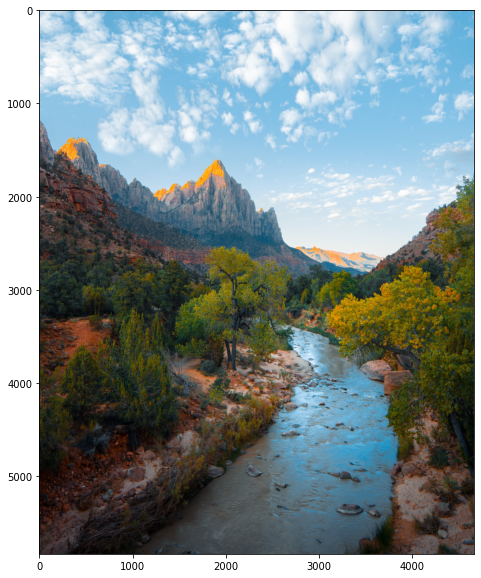

In [2]:
image = musx_images.load_image("../images/stream.jpg")
musx_images.display_image(image)

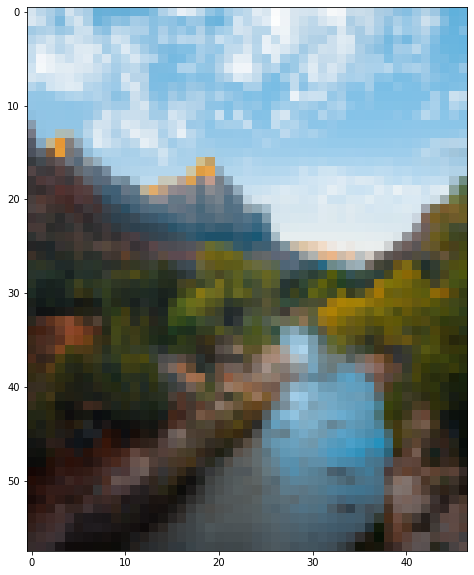

In [3]:
shrunk_image = musx_images.shrink_image(image, 0.01)
musx_images.display_image(shrunk_image)

## lines and line_2d

Use of another one of musx-images' 2D generators, line_2d. Starts at the top left, follows a line, then draws another line. Repeats until the generator is done.

In [25]:
def lines(queue, chan, image, notes, length, rhy):
    rhythms = musx.choose([0, rhy/4, rhy/2, [0, rhy/2], [0, rhy/4, rhy/2, 3 * (rhy/4)], [0, 3 * (rhy/4)]])
    
    start_row = 0
    start_col = 0
    
    played = 0
    while True:
        target_row = round(musx.uniran() * (image.shape[0] - 1))
        target_col = round(musx.uniran() * (image.shape[1] - 1))
        line_gen = musx_images.line_2d(image, start_row=0, start_col=0, end_row=target_row, end_col=target_col, num_steps=20)
        for (triad_raw, location) in line_gen:
            triad = map(lambda x : notes[round(musx.rescale(x, 0, 255, 0, len(notes) - 1))], triad_raw)
            for note_num in triad:
                r = next(rhythms)
                if musx.isnum(r):
                    queue.out.addevent(musx.MidiNote(time=queue.now, dur=rhy - r, key=note_num, chan=chan))
                else:
                    deltas = musx.deltas(r + [rhy])
                    for ind, time in enumerate(r):
                        queue.out.addevent(musx.MidiNote(time=queue.now + time, dur=deltas[ind], key=note_num, chan=chan))
            played += 1
            yield rhy
        
        start_row = target_row
        start_col = target_col

        if played >= length:
            break
   
        

In [31]:
points = []

t0 = musx.MidiSeq.metaseq(ins={0: musx.midi.gm.Kalimba, 1: musx.midi.gm.Kalimba, 2: musx.midi.gm.Kalimba})
t1 = musx.MidiSeq()

queue = musx.Scheduler(out=t1)

musx_images.clear_points_cache()

queue.compose([
    [0, lines(queue, 0, shrunk_image, musx.scale(48, 31, 2, 2, 1, 2, 2, 2, 1), 100, 1)],
    [10, lines(queue, 1, shrunk_image, musx.scale(48, 31, 2, 2, 1, 2, 2, 2, 1), 100, 1)],
    [20, lines(queue, 2, shrunk_image, musx.scale(48, 31, 2, 2, 1, 2, 2, 2, 1), 100, 1)]
])

musx.MidiFile("lines.mid", [t0, t1]).write()
# Use Fluidsynth or some other software to play

Done!


<MidiFile: 'lines.mid' 0x7fae27275dc0>

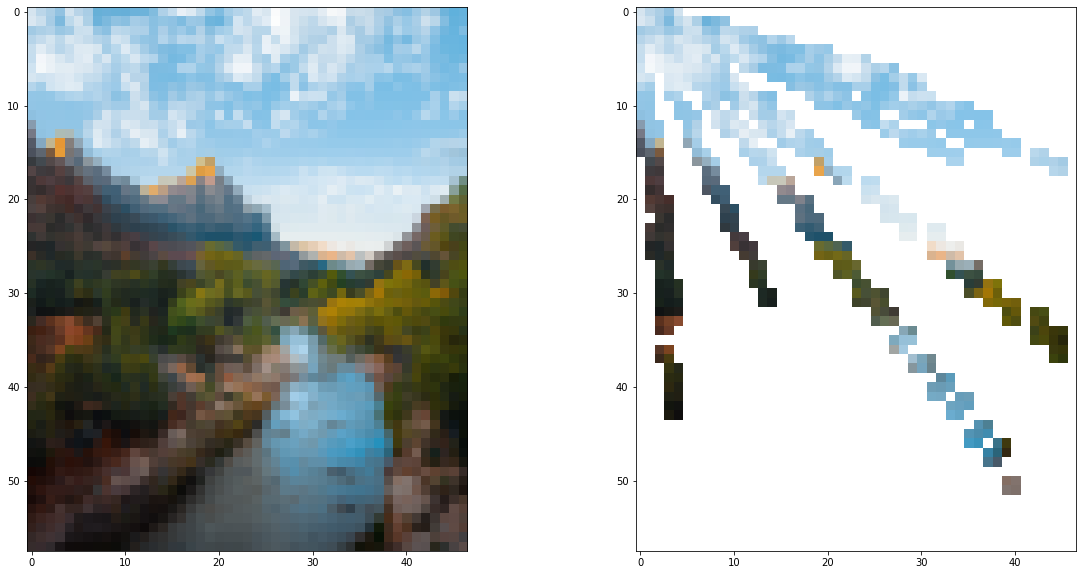

In [32]:
points_image = musx_images.points_image(shrunk_image, musx_images.points_cache, enlarge=1)
musx_images.display_images([shrunk_image, points_image])